In [3]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [6]:
# a function so we can show images later easily
def show_image(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    #plt.axis('off')
    plt.show()

### 1

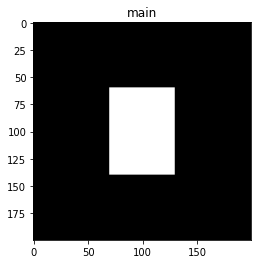

In [7]:
img = np.zeros([200, 200])
m = 80
n = 60
for i in range(m):
    for j in range(n):
        u = 100-int(m/2)+i
        v = 100-int(n/2)+j
        img[u,v] = 255
show_image(img, "main")

### 2

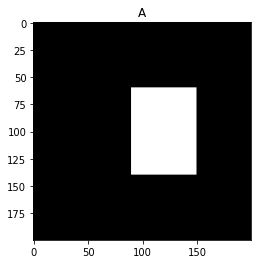

In [13]:
### a
M1 = np.float32([[1,0,20],[0,1,0]])
new_img = cv.warpAffine(img,M1,(200,200))
show_image(new_img, "A")

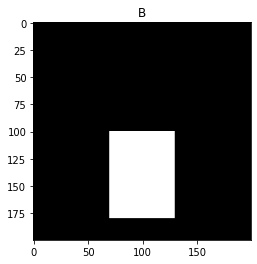

In [17]:
### b
M1 = np.float32([[1,0,0],[0,1,40]])
new_img = cv.warpAffine(img,M1,(200,200))
show_image(new_img, "B")

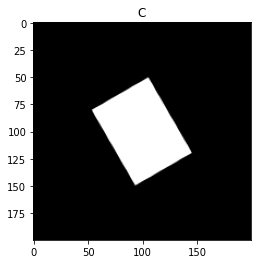

In [18]:
### c
center = (200/2, 200/2)
rotate_matrix_2d = cv.getRotationMatrix2D(center=center, angle=30, scale=1)
new_img = cv.warpAffine(src=img, M=rotate_matrix_2d, dsize=(200, 200))
show_image(new_img, "C")

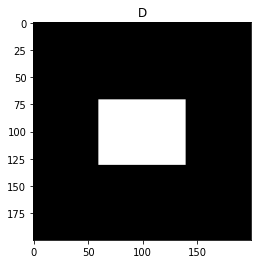

In [19]:
### d
center = (200/2, 200/2)
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=90, scale=1)
new_img = cv.warpAffine(src=img, M=rotate_matrix, dsize=(200, 200))
show_image(new_img, "D")

### 3

/tmp/ipykernel_19684/3052771819.py:5: RuntimeWarning: divide by zero encountered in log
  log = np.log(np.abs(fshift))


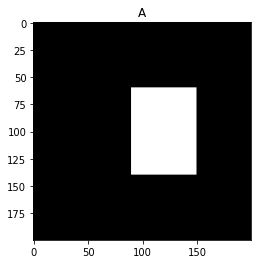

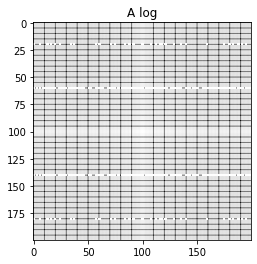

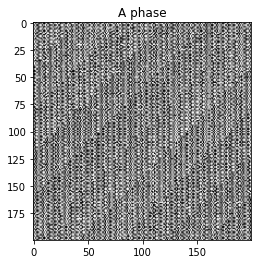

In [23]:
M1 = np.float32([[1,0,20],[0,1,0]])
new_img = cv.warpAffine(img,M1,(200,200))
f = np.fft.fft2(new_img)
fshift = np.fft.fftshift(f)
log = np.log(np.abs(fshift))
phase = np.angle(fshift)
show_image(new_img, "A")
show_image(log, "A log")
show_image(phase, "A phase")

/tmp/ipykernel_19684/4223940144.py:5: RuntimeWarning: divide by zero encountered in log
  log = np.log(np.abs(fshift))


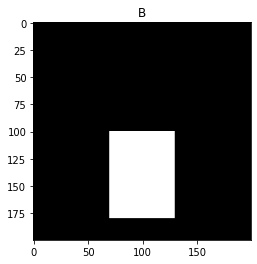

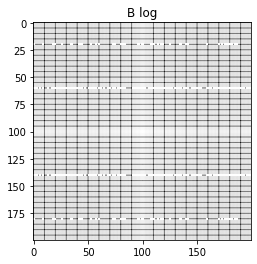

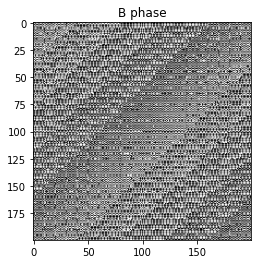

In [24]:
M1 = np.float32([[1,0,0],[0,1,40]])
new_img = cv.warpAffine(img,M1,(200,200))
f = np.fft.fft2(new_img)
fshift = np.fft.fftshift(f)
log = np.log(np.abs(fshift))
phase = np.angle(fshift)
show_image(new_img, "B")
show_image(log, "B log")
show_image(phase, "B phase")

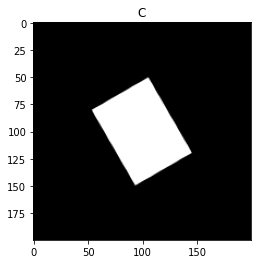

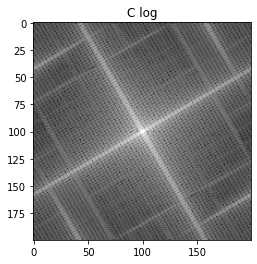

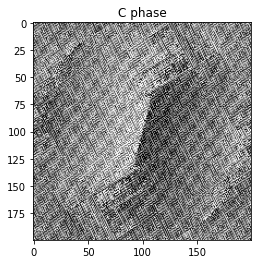

In [25]:
center = (200/2, 200/2)
rotate_matrix_2d = cv.getRotationMatrix2D(center=center, angle=30, scale=1)
new_img = cv.warpAffine(src=img, M=rotate_matrix_2d, dsize=(200, 200))
f = np.fft.fft2(new_img)
fshift = np.fft.fftshift(f)
log = np.log(np.abs(fshift))
phase = np.angle(fshift)
show_image(new_img, "C")
show_image(log, "C log")
show_image(phase, "C phase")

/tmp/ipykernel_19684/3821433355.py:6: RuntimeWarning: divide by zero encountered in log
  log = np.log(np.abs(fshift))


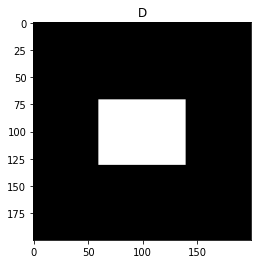

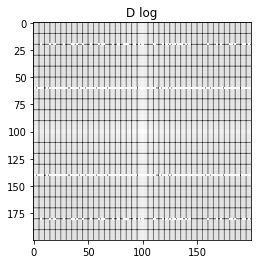

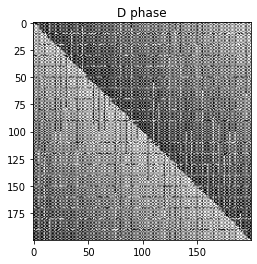

In [27]:
center = (200/2, 200/2)
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=90, scale=1)
new_img = cv.warpAffine(src=img, M=rotate_matrix, dsize=(200, 200))
f = np.fft.fft2(new_img)
fshift = np.fft.fftshift(f)
log = np.log(np.abs(fshift))
phase = np.angle(fshift)
show_image(new_img, "D")
show_image(log, "D log")
show_image(phase, "D phase")

### 4

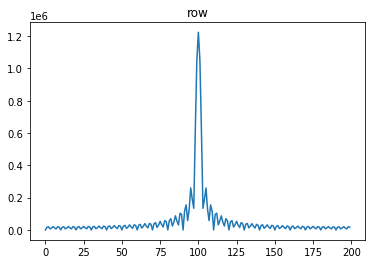

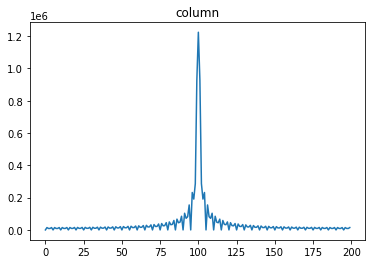

In [33]:
f_img = np.fft.fft2(img)
f_img = np.fft.fftshift(f_img)
u_0 = f_img[100,:]
v_0 = f_img[:,100]
plt.plot(np.abs(u_0))
plt.title('row')
plt.show()
plt.plot(np.abs(v_0))
plt.title('column')
plt.show()

### 5

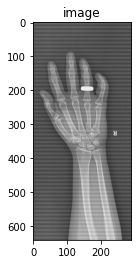

In [53]:
img2 = cv.imread('metacarpal.png',0)
show_image(img2, "image")

### 6

In [54]:
zero_padding = [0,0,0]
new_img2 = cv.copyMakeBorder(img2,0,m,0,n,cv.BORDER_CONSTANT,value=zero_padding)
p, q = new_img2.shape
h = np.ones((p, q))
w = 50
h[p//4-w:3*p//4+w, q//4-w:q//4+w] = 0
h[3*p//4-w:3*p//4+w, q//4-w:3*q//4+w] = 0
h[p//4-w:3*p//4+w, 3*q//4-w:3*q//4+w] = 0
h[p//4-w:p//4+w, q//4-w:3*q//4+w] = 0
f = np.fft.fft2(new_img2)
fshift = np.fft.fftshift(f)

### 7

/tmp/ipykernel_19684/32438876.py:3: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_filtered = np.log(np.abs(filtered_fshift))


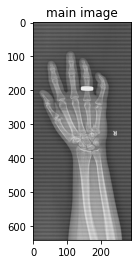

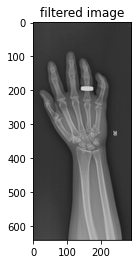

In [56]:

filtered_fshift = fshift*h
magnitude_spectrum_img2 = np.log(np.abs(fshift))
magnitude_spectrum_filtered = np.log(np.abs(filtered_fshift))

f_new = np.fft.ifftshift(filtered_fshift)
img_new = np.fft.ifft2(f_new)
unpadded_img_new = img_new[0:p//2,0:q//2]
show_image(abs(img2), "main image")
show_image(abs(unpadded_img_new), "filtered image")


### 8

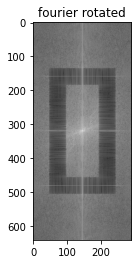

In [60]:
f = np.fft.fft2(unpadded_img_new)
center = (m/2, n/2)
rotate_f = np.rot90(f)
rotate_f = np.rot90(rotate_f)
fshift = np.fft.fftshift(rotate_f)
show_image(np.log(np.abs(fshift)), "fourier rotated")


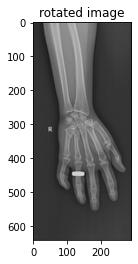

In [63]:

rotate_img = np.fft.ifft2(rotate_f)

show_image(abs(rotate_img), "rotated image")

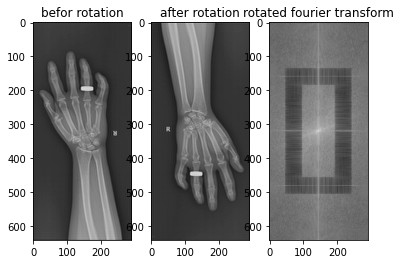

In [69]:
plt.subplot(131)
plt.imshow(abs(unpadded_img_new), cmap = 'gray')
plt.title('befor rotation')
plt.subplot(132)
plt.imshow(abs(rotate_img), cmap = 'gray')
plt.title('after rotation')
plt.subplot(133)
plt.imshow(np.log(np.abs(fshift)), cmap = 'gray')
plt.title('rotated fourier transform')

plt.show()